# LNG Lidar 

In [1]:
import xarray as xr
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from tqdm import tqdm
%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
LNG_DIR = Path('/homedata/nmpnguyen/LNG/NETCDF/')
LNG_LISTFILES = sorted(LNG_DIR.glob('LNG_HSRL_RAW_L1_TEMP_CADDIWA_*.nc'))
LNG_LISTFILES

[PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210908_F5_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210910_F6_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F8_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210914_F9_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210916_F10_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210917_F11_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210918_F12_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210919_F13_rg_err_ntirs100.nc')]

In [4]:
filepath = LNG_LISTFILES[5]
data = xr.open_dataset(filepath)
data

<xarray.Dataset>
Dimensions:                                              (height: 3500, time: 2000, wavelengths: 3)
Dimensions without coordinates: height, time, wavelengths
Data variables: (12/94)
    Time                                                 (time) float32 ...
    Height                                               (time, height) float32 ...
    Range                                                (height) float32 ...
    Latitude                                             (time) float32 ...
    Longitude                                            (time) float32 ...
    Aircraft_Altitude                                    (time) float32 ...
    ...                                                   ...
    Cdepol_flag                                          (time) float32 ...
    Mask_532                                             (time, height) float64 ...
    Mask_1064                                            (time, height) float64 ...
    LNG_Lidar_Wavelength                                 (wavelengths) float32 ...
    LNG_Lidar_Telescope_Field_Of_View                    (wavelengths) float32 ...
    LNG_Lidar_Beam_Divergence                            (wavelengths) float32 ...
Attributes:
    Level:        L1_TEMP
    Description:  LNG L0 concatenated HSR and DET DATA - LNG data - 532, 1064...
    created:      20220214
    Author:       quitterie.cazenave@latmos.ipsl.fr
    Campaign:     CADDIWA
    Day:          20210916
    Flight:       10
    Thermo:       ERA5
    Angles:       Lidar angles: validated with ground echo

In [12]:
transmittance355 = data['Model_Molecular_Transmittance_532'].where((data['Validity_rate']==1) & (data['LNG_UpDown']==1), drop=True)
# MPAB355 = data['LNG_Molecular_Parallel_Attenuated_Backscatter_532'].where((data['Validity_rate']==1) & (data['LNG_UpDown']==1), drop=True)
MMB355 = data['Model_Molecular_Backscatter_532'].where((data['Validity_rate']==1) & (data['LNG_UpDown']==1), drop=True)
ATB355 = data['LNG_Total_Attenuated_Backscatter_532'].where((data['Validity_rate']==1) & (data['LNG_UpDown']==1), drop=True)

In [15]:
MMB355*transmittance355, ATB355

(<xarray.DataArray (time: 665, height: 3500)>
 array([[6.4693546e-07, 6.4730011e-07, 6.4766476e-07, ..., 9.3286366e-07,
         9.3272263e-07, 9.3258137e-07],
        [6.4559691e-07, 6.4596179e-07, 6.4632650e-07, ..., 9.3312582e-07,
         9.3298473e-07, 9.3284365e-07],
        [6.4414189e-07, 6.4450694e-07, 6.4487193e-07, ..., 9.3313417e-07,
         9.3299309e-07, 9.3285200e-07],
        ...,
        [9.5078821e-07, 9.5127797e-07, 9.5176750e-07, ..., 8.9576582e-07,
         8.9562997e-07, 8.9549417e-07],
        [9.5067179e-07, 9.5116155e-07, 9.5165115e-07, ..., 8.9577281e-07,
         8.9563702e-07, 8.9550116e-07],
        [9.5067179e-07, 9.5110335e-07, 9.5159294e-07, ..., 8.9577770e-07,
         8.9564196e-07, 8.9550616e-07]], dtype=float32)
 Dimensions without coordinates: time, height,
 <xarray.DataArray 'LNG_Total_Attenuated_Backscatter_532' (time: 665, height: 3500)>
 array([[ 4.6501798e-09,  4.5810360e-09,  4.5124091e-09, ...,
          8.5367656e-06,  8.3050627e-06,  6.043

<IPython.core.display.Javascript object>


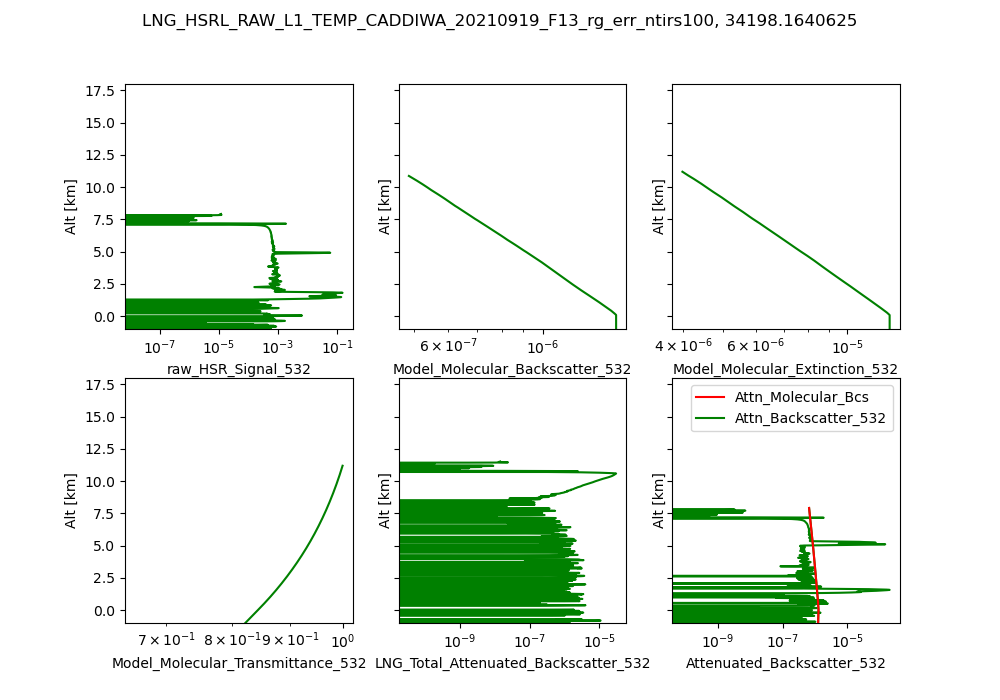

(1582, 3500) (1582, 3500)
(1582, 3500) (1582, 3500)
(1582, 3500) (1582, 3500)
(1582, 3500) (1582, 3500)
(1582, 3500) (1582, 3500)
(1582, 3500) (1582, 3500)


In [183]:
keys = ['raw_HSR_Signal_532', 'Model_Molecular_Backscatter_532', 'Model_Molecular_Extinction_532','Model_Molecular_Transmittance_532', 
        'LNG_Total_Attenuated_Backscatter_532']
import random
fig, axes = plt.subplots(ncols=3, nrows=2, sharey=True, figsize=(10,7))
for i,ax in enumerate(axes.flat):
    valid_rate = (data['Validity_rate'] == 1) 
    height, time, Pointing = data['Height'].isel(time=valid_rate).values , data['Time'].isel(time=valid_rate).values, data['LNG_UpDown'].isel(time=valid_rate).values
    height2, time2 = height[np.unique(np.where(Pointing==1)[0]),:], time[np.unique(np.where(Pointing==1)[0])], 
    if i == 5 : 
        dt = data[keys[1]].isel(time=valid_rate).values * data[keys[3]].isel(time=valid_rate).values
        xlabel = 'Attenuated_Backscatter_532'
    elif i<5:     
        dt = data[keys[i]].isel(time=valid_rate).values
        xlabel=keys[i]
    
    dt2 = dt[np.unique(np.where(Pointing==1)[0]),:]
    print(height2.shape, dt2.shape)
    idx = random.randint(0, time2.shape[0])
    ax.semilogx(dt2[idx,:], height2[idx,:], color='g')
    ax.set_ylim(-1, 18)
    ax.set(xlabel=xlabel, ylabel='Alt [km]')

axes[1,2].plot(dt2[idx,:], height2[idx,:], 'r', label='Attn_Molecular_Bcs', zorder=10)
dt = data[keys[-1]].isel(time=valid_rate).values
dt2 = dt[np.unique(np.where(Pointing==1)[0]),:]
axes[1,2].plot(dt2[idx,:], height2[idx,:], 'g', label='Attn_Backscatter_532')
axes[1,2].legend()
plt.suptitle(f'{filepath.stem}, {time2[idx]}')
plt.savefig(Path('/homedata/nmpnguyen/LNG/Figs/', f'{filepath.stem}_{time2[idx]}.png'))

In [12]:
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# find_nearest_index(data['Time'].values, 70000)
key532 = ['raw_HSR_Signal_532', 
          'Model_Molecular_Backscatter_532', 
          'Model_Molecular_Extinction_532',
          'Model_Molecular_Transmittance_532', 
          'LNG_Total_Attenuated_Backscatter_532']

key355 = ['raw_HSR_Signal_355', 
        'Model_Molecular_Backscatter_355', 
        'Model_Molecular_Extinction_355',
        'Model_Molecular_Transmittance_355', 
        'LNG_Molecular_Parallel_Attenuated_Backscatter_355',
        'LNG_Parallel_Attenuated_Backscatter_355',
        'LNG_Perpendicular_Attenuated_Backscatter_355']

time_to_see = [0, 78000, 36000, 54700, 31200, 72000, 68000, 60000, 37000]

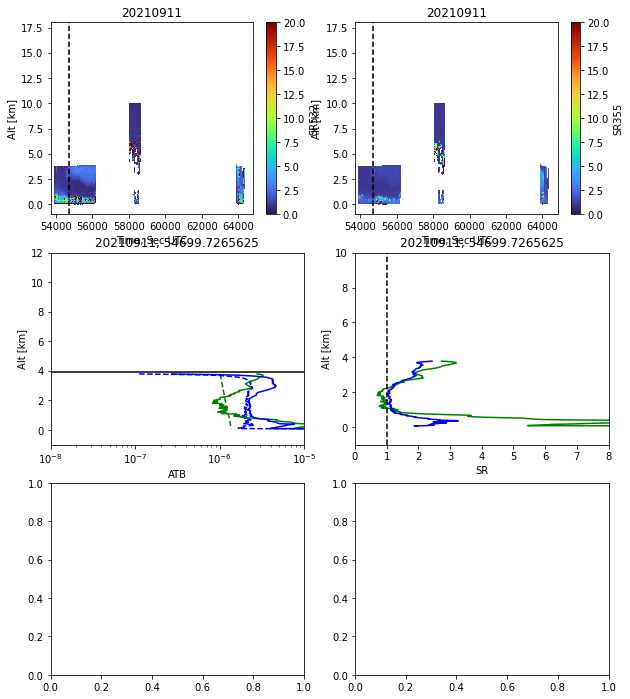

In [13]:

for filepath, i in zip(LNG_LISTFILES[3:4], range(3,4)):
    fig, ((ax, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(10,12))
    data = xr.open_dataset(filepath)
    valid_rate = (data['Validity_rate'] == 1) 
    height, time, Pointing = data['Height'].isel(time=valid_rate).values , data['Time'].isel(time=valid_rate).values, data['LNG_UpDown'].isel(time=valid_rate).values
    maskHSR532 = data['Mask_532'].isel(time=valid_rate).values
    idx = find_nearest_index(time, time_to_see[i])
    limitez = np.where((height[idx,:] > 2.5) & (height[idx,:] < 3))[0]
    # 532nm
    mol = data[key532[1]].isel(time=valid_rate) * data[key532[3]].isel(time=valid_rate)
    atb = data[key532[-1]].isel(time=valid_rate)
#     pr2_integ = 0; mol_attn_integ = 0
#     for z in limitez[:-1]:
#         pr2_integ = pr2_integ + atb[idx,z]*(height[idx, z+1] - height[idx, z])
#         mol_attn_integ = mol_attn_integ + mol[idx,z]*(height[idx, z+1] - height[idx, z])

#     const = (mol_attn_integ/pr2_integ).reshape(-1,1)
#     print(const)
    sr = atb/mol
    sr532 = sr.where(((Pointing == 1)& np.isin(maskHSR532, [0,1,2,3])), drop=False)
    sr532_clear = sr.where(((Pointing == 1)& (maskHSR532 == 0)), drop=False)
    atb532 = atb.where(((Pointing == 1)& np.isin(maskHSR532, [0,1,2,3])), drop=False)
    mol532 = mol.where(((Pointing ==1)& np.isin(maskHSR532, [0,1,2,3])), drop=False)
    ax3.semilogx(mol532[idx,:], height[idx,:], '--', color='g')
    # 355nm
    mol = data[key355[4]].isel(time=valid_rate)# * data[key355[3]].isel(time=valid_rate)
    atb = data[key355[-2]].isel(time=valid_rate) + data[key355[-1]].isel(time=valid_rate)
#     pr2_integ = 0; mol_attn_integ = 0
#     for z in limitez[:-1]:
#         pr2_integ = pr2_integ + atb[:,z]*(height[:, z+1] - height[:, z])
#         mol_attn_integ = mol_attn_integ + mol[:,z]*(height[:, z+1] - height[:, z])

#     const = (mol_attn_integ/pr2_integ).reshape(-1,1)
#     print(const[idx])
    sr = atb/mol
    sr355 = sr.where(((Pointing == 1)& np.isin(maskHSR532, [0,1,2,3])), drop=False) #np.ma.masked_where(Pointing!=1, sr)
    sr355_clear = sr.where(((Pointing == 1)& (maskHSR532 == 0)), drop=False)
    atb355 = atb.where(((Pointing == 1)& np.isin(maskHSR532, [0,1,2,3])), drop=False)
    mol355 = mol.where(((Pointing ==1)& np.isin(maskHSR532, [0,1,2,3])), drop=False)
    ax3.semilogx(mol355[idx,:], height[idx,:], '--', color='b')
    
    pcm = ax.pcolormesh(time, height.T, sr532.values.T, cmap='turbo', vmin=0, vmax=20)
    ax.set_ylim(-1,18)
    plt.colorbar(pcm, ax=ax, label='SR532')
    ax.set(xlabel='Time, Sec UTC', ylabel='Alt [km]', title=f'{filepath.stem.split("_")[6]}')
    
    pcm = ax2.pcolormesh(time, height.T, sr355.values.T, cmap='turbo', vmin=0, vmax=20)
    ax2.set_ylim(-1,18)
    plt.colorbar(pcm, ax=ax2, label='SR355')
    ax2.set(xlabel='Time, Sec UTC', ylabel='Alt [km]', title=f'{filepath.stem.split("_")[6]}')
    

    ax.axvline(time[idx], color="black", linestyle="--")
    ax2.axvline(time[idx], color="black", linestyle="--")
    ax3.semilogx(atb532[idx,:], height[idx,:], color='g', label='532')
    ax3.semilogx(atb355[idx,:], height[idx,:], color='b', label='355')    
    ax3.axhline(data['Aircraft_Altitude'].isel(time=valid_rate).values[idx],  color='k', linestyle='-')
    ax3.set_ylim(-1, 12)
    ax3.set_xlim(1e-08, 1e-5)
    ax3.set(xlabel='ATB', ylabel='Alt [km]', title=f'{filepath.stem.split("_")[6]}, {time[idx]}')

    ax4.plot((atb532/mol532)[idx,:], height[idx,:], color='g', label='532')
    ax4.plot((atb355/mol355)[idx,:], height[idx,:], color='b', label='355')    
    ax4.axvline(1, color="black", linestyle="--") 
    ax4.set_ylim(-1, 10)
    ax4.set_xlim(0,8)
    ax4.set(xlabel='SR', ylabel='Alt [km]', title=f'{filepath.stem.split("_")[6]}, {time[idx]}')
    
#     Xx, Yy, Hcounts, _ = get_params_histogram([[0,50], [0,100]], sr355.values.flatten(), sr532.values.flatten())
#     hist = ax5.pcolormesh(Xx, Yy, Hcounts.T, norm=LogNorm(vmin=1e-4, vmax=1e-1))
#     c = plt.colorbar(hist, ax=ax5, label='%')
#     plt.minorticks_on()
#     ax5.set(xlabel='SR355', ylabel='SR532', title='clear sky + particules')
#     ax5.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)
    
#     Xx, Yy, Hcounts, _ = get_params_histogram([[0,50], [0,100]], sr355_clear.values.flatten(), sr532_clear.values.flatten())
#     hist = ax6.pcolormesh(Xx, Yy, Hcounts.T, norm=LogNorm(vmin=1e-4, vmax=1e-1))
#     c = plt.colorbar(hist, ax=ax6, label='%')
#     plt.minorticks_on()
#     ax6.set(xlabel='SR355', ylabel='SR532', title='clear sky')
#     ax6.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)
    
#     plt.tight_layout()
#     plt.savefig(Path('/homedata/nmpnguyen/LNG/Figs/', f'Illus_ClearSky_Particules_Nadir_{filepath.stem}.png'))

In [160]:
atb532.dropna(how='all', dim='time').shape[0]

591

In [113]:
valid_rate = (data['Validity_rate'] == 1) 
height, time, Pointing = data['Height'].isel(time=valid_rate).values , data['Time'].isel(time=valid_rate).values, data['LNG_UpDown'].isel(time=valid_rate).values
# idx = find_nearest_index(time, time_to_see[5])
limitez = np.where((height[idx,:] > 2.5) & (height[idx,:] < 3))[0]

#---------------------------------
pr2_norm = data[key355[-2]].isel(time=valid_rate).values
mol_attn = data[key355[1]].isel(time=valid_rate).values * data[key355[3]].isel(time=valid_rate).values

pr2_integ = 0; mol_attn_integ = 0
for z in range(len(limitez)-1):
    pr2_integ = pr2_integ + pr2_norm[idx,z]*(height[idx,limitez[z]]- height[idx,limitez[z+1]])
    mol_attn_integ = mol_attn_integ + mol_attn[idx,z]*(height[idx,limitez[z]]- height[idx,limitez[z+1]])

const = mol_attn_integ/pr2_integ
print(mol_attn_integ, pr2_integ)

#---------------------------------
pr2_norm2 = data[key532[-1]].isel(time=valid_rate).values
mol_attn2 = data[key532[1]].isel(time=valid_rate).values * data[key532[3]].isel(time=valid_rate).values

pr2_integ2 = 0; mol_attn_integ2 = 0
for z in limitez[:-1]:
    pr2_integ2 = pr2_integ2 + pr2_norm2[idx,z]*(height[idx, z+1] - height[idx, z])
    mol_attn_integ2 = mol_attn_integ2 + mol_attn2[idx,z]*(height[idx, z+1] - height[idx, z])

const2 = mol_attn_integ2/pr2_integ2
print(const2)

2.444039198579162e-06 -0.0010482083483063088
0.3746591511467547


In [112]:
data[][idx,limitez]

array([3.7317366e-06, 3.7338482e-06, 3.7377042e-06, 3.7428631e-06,
       3.7477087e-06, 3.7516731e-06, 3.7555835e-06, 3.7600935e-06,
       3.7648708e-06, 3.7695479e-06, 3.7746145e-06, 3.7809095e-06,
       3.7880793e-06, 3.7940727e-06, 3.7968150e-06, 3.7961868e-06,
       3.7938021e-06, 3.7913399e-06, 3.7898601e-06, 3.7897983e-06,
       3.7905461e-06, 3.7907485e-06, 3.7892974e-06, 3.7858792e-06,
       3.7810489e-06, 3.7755658e-06, 3.7699619e-06, 3.7651671e-06,
       3.7630978e-06, 3.7656503e-06, 3.7729783e-06, 3.7829766e-06,
       3.7920172e-06, 3.7965265e-06, 3.7954062e-06, 3.7907598e-06,
       3.7855007e-06, 3.7811194e-06, 3.7776786e-06, 3.7745881e-06,
       3.7716982e-06, 3.7700240e-06, 3.7707821e-06, 3.7736841e-06,
       3.7767229e-06, 3.7781429e-06, 3.7778600e-06, 3.7764053e-06,
       3.7733630e-06, 3.7679088e-06, 3.7599657e-06, 3.7502768e-06,
       3.7403847e-06, 3.7321834e-06, 3.7265302e-06, 3.7225082e-06,
       3.7188363e-06, 3.7157201e-06, 3.7146042e-06, 3.7158718e

77999.92


<IPython.core.display.Javascript object>


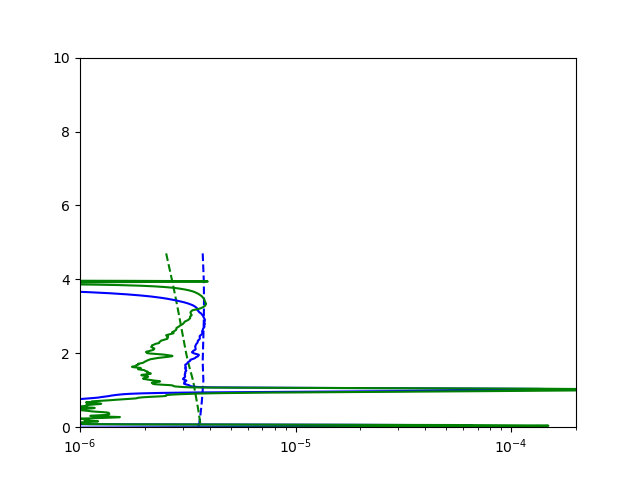

(1e-06, 0.0002)

In [77]:
print(time[idx])
fig, ax = plt.subplots()
ax.semilogx(mol_attn[idx,:]/const, height[idx,:], '--', color='b')
ax.semilogx(mol_attn2[idx,:]/const2, height[idx,:], '--', color='g')
ax.plot(pr2_norm[idx,:], height[idx,:], color='b')
ax.plot(pr2_norm2[idx,:], height[idx,:], color='g')
# ax.plot(pr2_norm[idx,:]/(mol_attn[idx,:]), height[idx,:], color='r')
# ax.axvline(1, color="black", linestyle="--") 
ax.set_ylim(0, 10)
# ax.set_xlim(0, 8)
ax.set_xlim(1e-6, 2e-4)

<IPython.core.display.Javascript object>


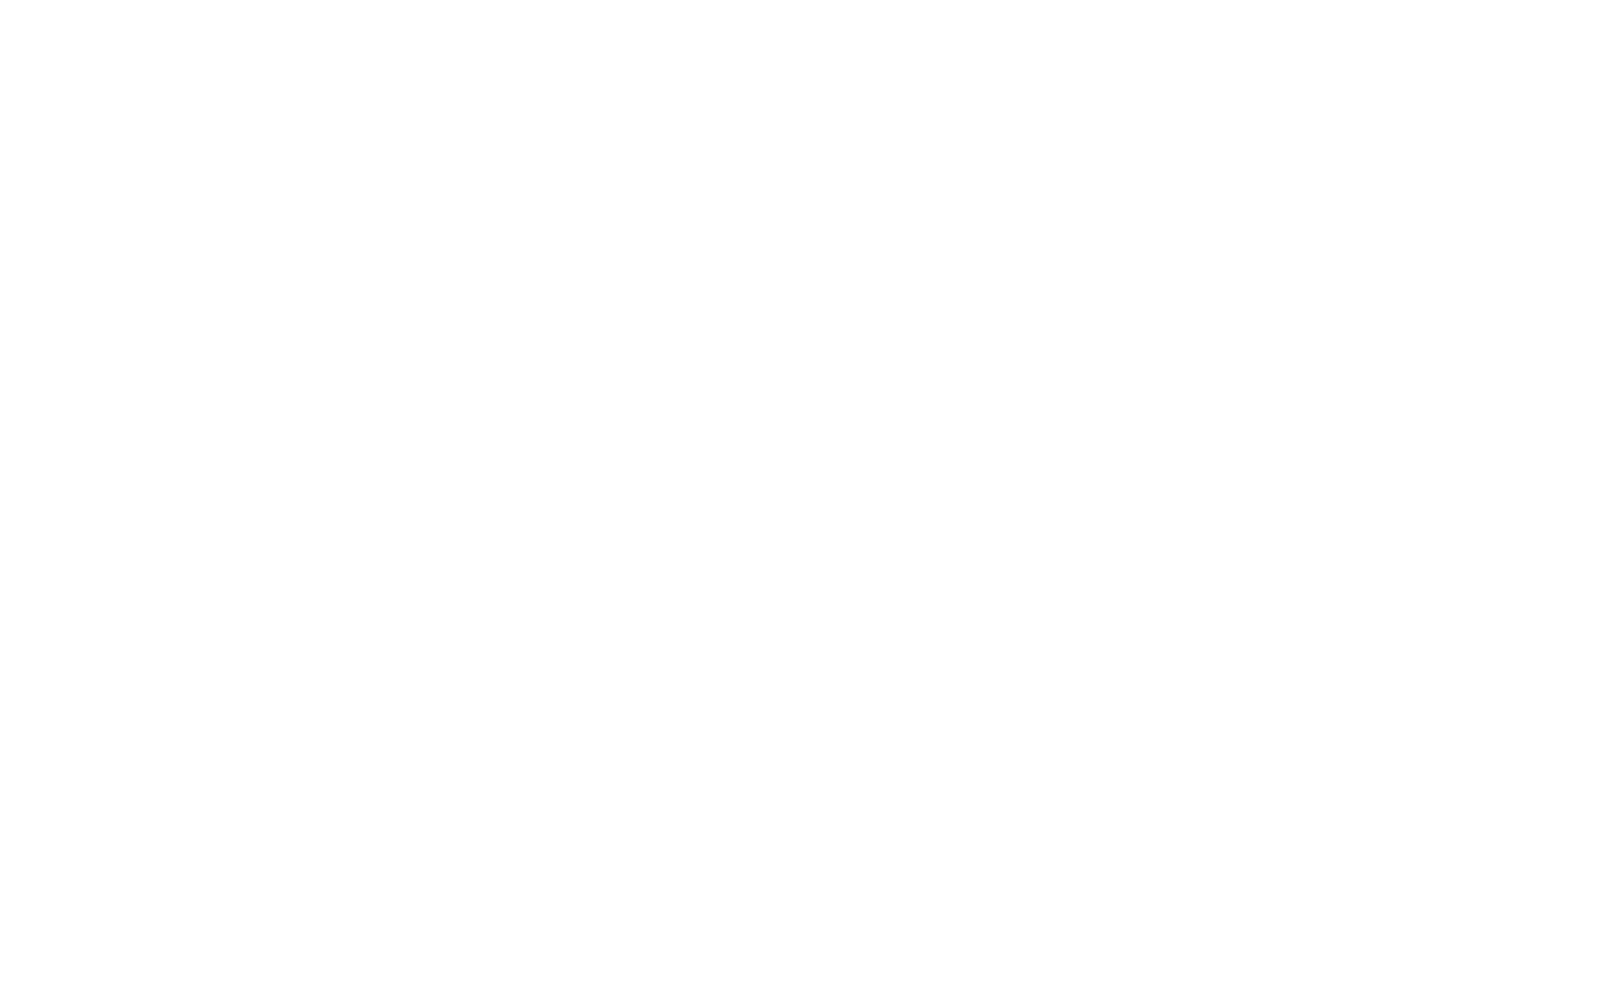

(2301, 3500)
(2301, 3500)
(2391, 3500)
(2391, 3500)
(2052, 3500)
(2052, 3500)
(1794, 3500)
(1794, 3500)
(1978, 3500)
(1978, 3500)
(2434, 3500)
(2434, 3500)
(2652, 3500)
(2652, 3500)
(2370, 3500)
(2370, 3500)


In [5]:
key532 = ['raw_HSR_Signal_532', 'Model_Molecular_Backscatter_532', 'Model_Molecular_Extinction_532','Model_Molecular_Transmittance_532', 
        'LNG_Total_Attenuated_Backscatter_532']

key355 = ['raw_HSR_Signal_355', 
        'Model_Molecular_Backscatter_355', 
        'Model_Molecular_Extinction_355',
        'Model_Molecular_Transmittance_355', 
        'LNG_Parallel_Attenuated_Backscatter_355',
        'LNG_Perpendicular_Attenuated_Backscatter_355']

time_to_see = [0, 77400, 36000, 58050, 31800, 72000, 68000, 60000, 37000]
import random

allsr355 = None
allsr532 = None
allatb355 = None
allatb532 = None
fig, axs = plt.subplots(figsize=(16,10), nrows=3, ncols=3)
for filepath, (i,ax) in zip(LNG_LISTFILES[1:], enumerate(axs.flat)):
    data = xr.open_dataset(filepath)
    valid_rate = (data['Validity_rate'] == 1) 
    height, time, Pointing = data['Height'].isel(time=valid_rate).values , data['Time'].isel(time=valid_rate).values, data['LNG_UpDown'].isel(time=valid_rate).values
#     height2, time2 = height[np.unique(np.where(Pointing==1)[0]),:], time[np.unique(np.where(Pointing==1)[0])], 
    maskHSR532 = data['Mask_532'].isel(time=valid_rate).values
    # SR 532
    mol = data[key532[1]].isel(time=valid_rate).values * data[key532[3]].isel(time=valid_rate).values
    atb = data[key532[-1]].isel(time=valid_rate).values
    sr = atb/mol
    sr_after = np.ma.masked_where((Pointing==3)|(Pointing==2), sr)
    sr532 = np.ma.masked_where(np.isin(maskHSR532, [0,1,2,3], invert=True), sr_after)
    atb532 = np.ma.masked_where(np.isin(maskHSR532, [0,1,2,3], invert=True), atb)
#     sr532 = sr[np.unique(np.where((Pointing==1)&(maskHSR532==1))[0]),:] #np.ma.masked_where(Pointing!=1, sr)
    print(sr532.shape)
#     time2 = time[np.unique(np.where(sr532.mask==False)[0])]
#     idx = random.choice(np.unique(np.where(sr532.mask==False)[0]))#random.randint(0, time2.shape[0])
#     idx = find_nearest_index(time, time_to_see[i])
#     ax.plot(sr532[idx,:], height[idx,:], color='g', label='532')
    
#     pcm = ax.pcolormesh(time, height.T, sr532.T, cmap='turbo', vmin=0, vmax=10)
#     ax.set_ylim(-1,18)
#     plt.colorbar(pcm, ax=ax)

    # SR 355
    mol = data[key355[1]].isel(time=valid_rate).values * data[key355[3]].isel(time=valid_rate).values
    atb = data[key355[-2]].isel(time=valid_rate).values + data[key355[-1]].isel(time=valid_rate).values
    sr = atb/mol
    sr_after = np.ma.masked_where((Pointing==3)|(Pointing==2), sr)
    sr355 = np.ma.masked_where(np.isin(maskHSR532, [0,1,2,3], invert=True), sr_after) #np.ma.masked_where(Pointing!=1, sr)
    atb355 = np.ma.masked_where(np.isin(maskHSR532, [0,1,2,3], invert=True), atb)
    print(sr355.shape)
#     ax.plot(sr355[idx,:], height[idx,:], color='b', label='355')    
#     ax.axvline(1, color="black", linestyle="--") 
#     ax.set_ylim(-1, 18)
#     ax.set_xlim(0, 5)
#     ax.set(xlabel='SR', ylabel='Alt [km]', title=f'{filepath.stem.split("_")[6]}, {time[idx]}')
#     pcm = ax.pcolormesh(time, height.T, (sr532/sr355).T, vmin=0, vmax=10, cmap='turbo')
#     plt.colorbar(pcm, ax=ax, label='SR 532')
#     ax.set_ylim(-1,18)
#     ax.set(xlabel='SR', ylabel='Alt [km]', title=f'{filepath.stem.split("_")[6]}')
    if (allatb532 is None )| (allatb355 is None):
        allatb355 = atb355.flatten()
        allatb532 = atb532.flatten()
    else:
        allatb355 = np.concatenate((allatb355, atb355.flatten()))
        allatb532 = np.concatenate((allatb532, atb532.flatten()))

In [ ]:
%matplotlib inline
Xx, Yy, Hcounts, _ = get_params_histogram([[-8,-3],[-8,-3]], np.log10(allatb355), np.log10(allatb532))
fig, ax = plt.subplots()
hist = ax.pcolormesh(Xx, Yy, Hcounts.T, norm=LogNorm(vmin=1e-4, vmax=1e-1))
c = plt.colorbar(hist, ax=ax, label='%')
# plt.xscale('log')
# plt.yscale('log')
# ax.set_xlim(1e-8, 1e-3)
# ax.set_ylim(1e-8, 1e-3)

plt.minorticks_on()
ax.set(xlabel='ATB 355', ylabel='ATB 532', title='ATB532/ATB355 ')
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

plt.savefig('/homedata/nmpnguyen/LNG/Figs/histo_ATB532_ATB355.png')

[       0        1        2 ... 62901997 62901998 62901999] [       0        1        2 ... 62901997 62901998 62901999]


(2301, 3500)
(2301,)


<IPython.core.display.Javascript object>


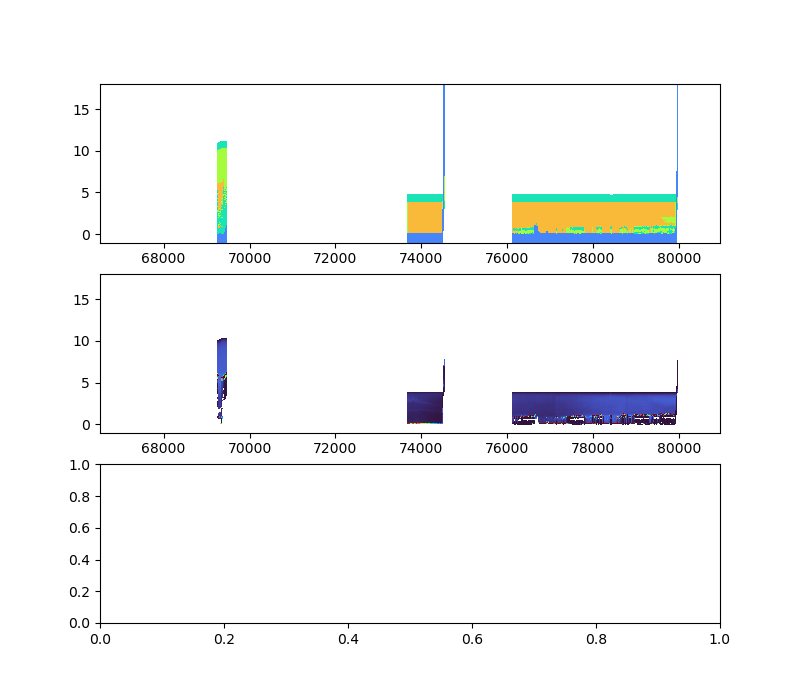

(-1.0, 18.0)

In [73]:
# a = np.ma.masked_where(np.isin(maskHSR532, [0,1,2], invert=True), sr)
a1 = np.ma.masked_where((Pointing==3)|(Pointing==2), maskHSR532)
a1after = np.ma.masked_where((Pointing==3)|(Pointing==2), sr)
a1after = np.ma.masked_where(np.isin(maskHSR532, [0,1,2,3], invert=True), a1after)
a2 = np.ma.masked_where((Pointing==3)|(Pointing==1), maskHSR532)
a3 = np.ma.masked_where((Pointing==1)|(Pointing==2), maskHSR532)
print(a1after.shape)
print(time.shape)

fig, (ax, ax2, ax3) = plt.subplots(nrows=3, figsize=(8,7))
ax.pcolormesh(time, height.T, a1.T, cmap='turbo', vmin=-3, vmax=3)
ax.set_ylim(-1,18)

ax2.pcolormesh(time, height.T, a1after.T, cmap='turbo', vmin=0, vmax=10)
ax2.set_ylim(-1,18)

# ax3.pcolormesh(time, height.T, a3.T, cmap='turbo', vmin=-3, vmax=3)
# ax3.set_ylim(-1,18)

In [7]:

def get_params_histogram(srlimite, Xdata, Ydata):
    def remove_NaN_Inf_values(arrayX, arrayY):
        idsX = np.where(~np.isnan(arrayX)&~np.isinf(arrayX))[0]
        idsY = np.where(~np.isnan(arrayY)&~np.isinf(arrayY))[0]
        print(idsX, idsY)
        mask = np.intersect1d(idsX, idsY)
        return mask
    
    from scipy import stats
    from scipy.optimize import curve_fit
    # objective function for best fit
    def objective(x, a, b):
        return a * x + b
    
#     if (~np.isnan(Xdata)|~np.isinf(Xdata)).sum() > (~np.isnan(Ydata)|~np.isinf(Ydata)).sum():
    mask = remove_NaN_Inf_values(Xdata, Ydata)
    print('A')
    H = np.histogram2d(Xdata[mask], Ydata[mask], bins=100, range = srlimite)
    Hprobas = H[0]*100/len(Ydata[mask])
    noNaNpoints = len(Ydata[mask])
    # create the curve fit
    param, param_cov = curve_fit(objective, Xdata[mask], Ydata[mask])     
    print(param, param_cov)

    print(f'nombre de points no-NaN: {noNaNpoints}')
    xedges, yedges = np.meshgrid(H[1], H[2])
#     print(slope, intercept)
#     fitLine = slope * allsr532 + intercept
    return xedges, yedges, Hprobas, noNaNpoints


In [26]:
# Xx, Yy, Hcounts, _ = get_params_histogram([[0,50], [0,100]], allsr355, allsr532)
Xx, Yy, Hcounts, _ = get_params_histogram([[0,50], [0,100]], sr355, sr532)

[ 2852500  2852501  2852502 ... 29228497 29228498 29228499] [ 2852500  2852501  2852502 ... 29228497 29228498 29228499]
A
[ 4.85224389e+01 -5.52986241e+07] [[5.07258916e-04 3.24738935e+02]
 [3.24738935e+02 1.00574312e+09]]
nombre de points no-NaN: 26376000


In [9]:
# Histogram SR532/SR355

fig, ax = plt.subplots()
hist = ax.pcolormesh(Xx, Yy, Hcounts.T, norm=LogNorm(vmin=1e-5, vmax=1e-1))
c = plt.colorbar(hist, ax=ax, label='%')
plt.minorticks_on()
ax.set(xlabel='SR355', ylabel='SR532')
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)
plt.savefig('/homedata/nmpnguyen/LNG/scatterSR_withoutmask.png')

<IPython.core.display.Javascript object>

NameError: name 'Xx' is not defined

<IPython.core.display.Javascript object>


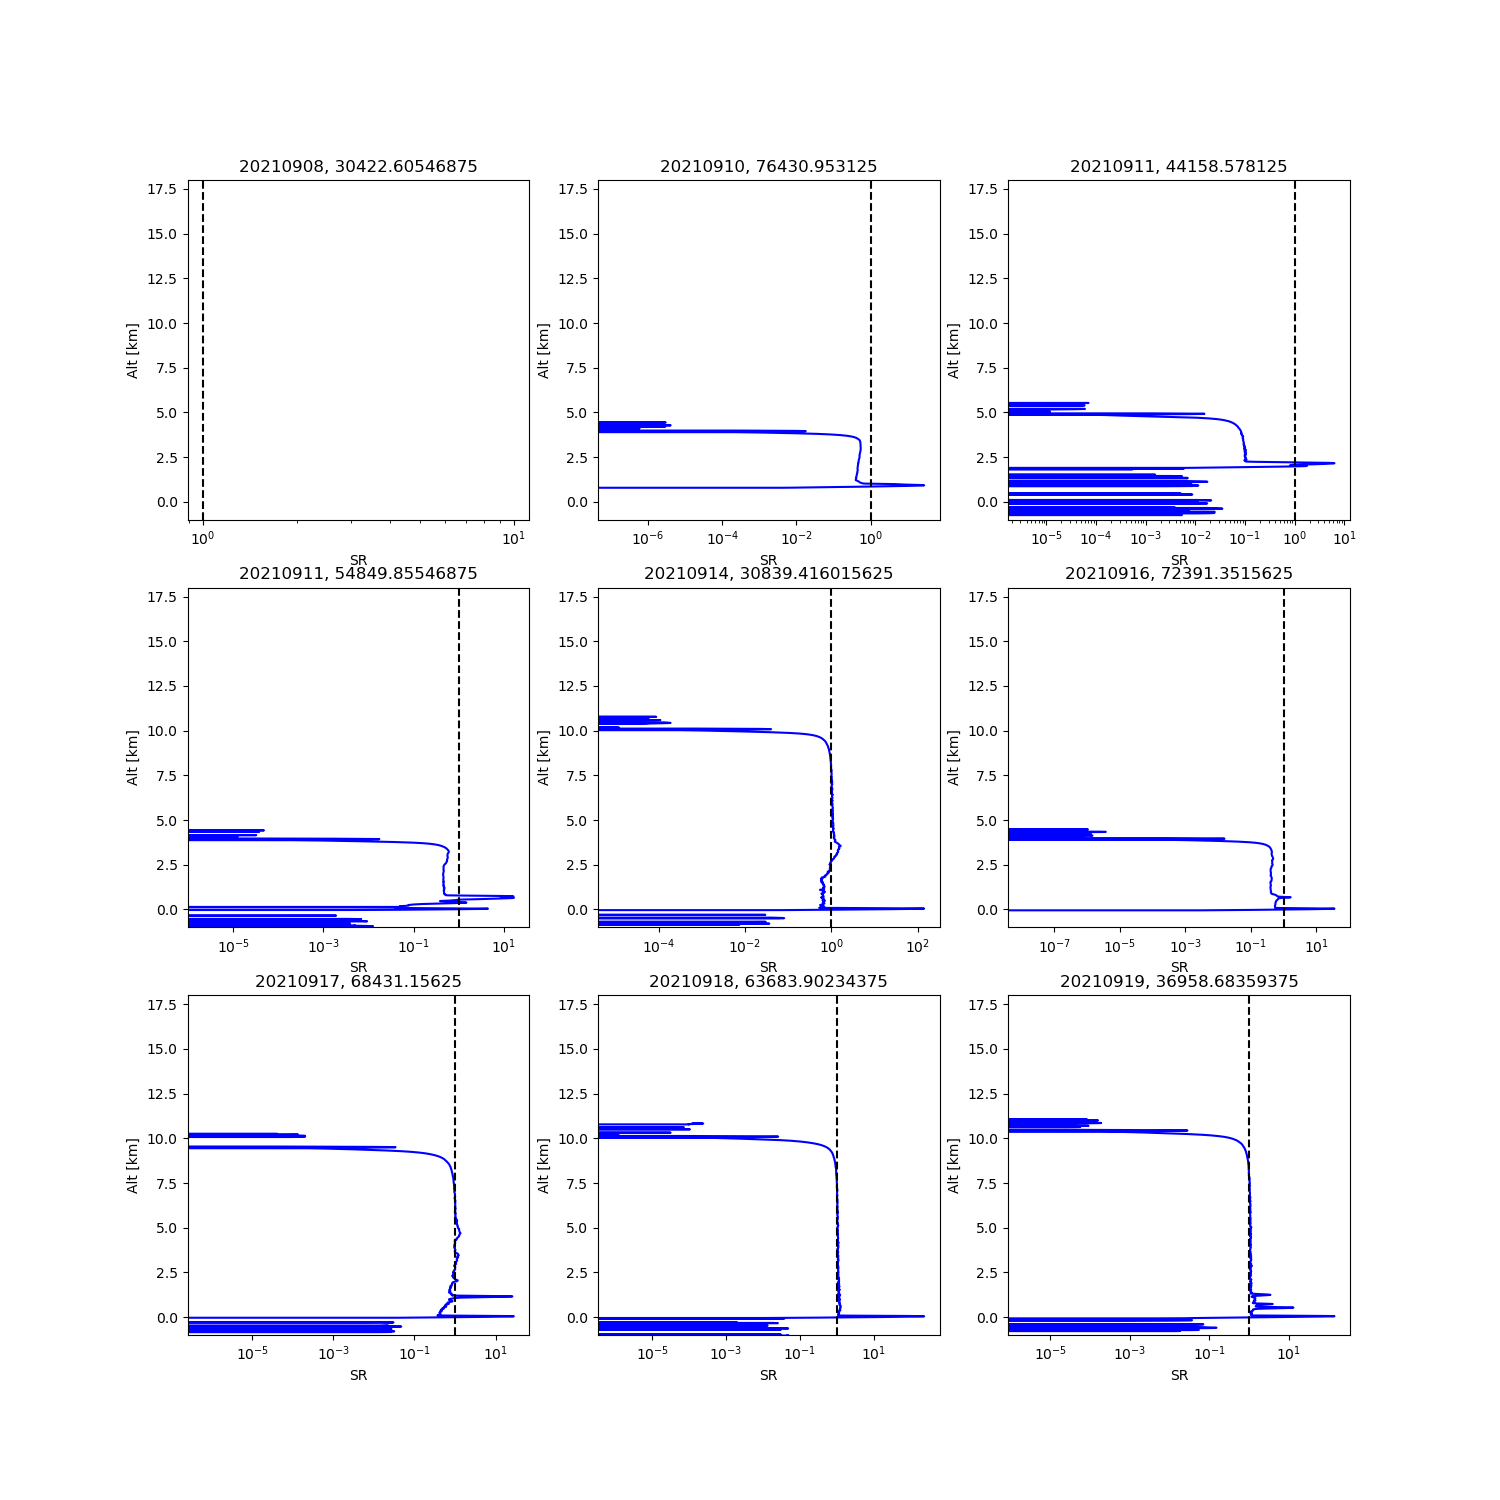

(815, 3500) (815, 3500)
(955, 3500) (955, 3500)
(843, 3500) (843, 3500)
(591, 3500) (591, 3500)
(263, 3500) (263, 3500)
(665, 3500) (665, 3500)
(894, 3500) (894, 3500)
(1743, 3500) (1743, 3500)
(1582, 3500) (1582, 3500)


In [200]:
# SR 355
keys = ['raw_HSR_Signal_355', 
        'Model_Molecular_Backscatter_355', 
        'Model_Molecular_Extinction_355',
        'Model_Molecular_Transmittance_355', 
        'LNG_Parallel_Attenuated_Backscatter_355',
        'LNG_Perpendicular_Attenuated_Backscatter_355']

fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=3)
for filepath, (i, ax) in zip(LNG_LISTFILES, enumerate(axs.flat)):
    data = xr.open_dataset(filepath)
    valid_rate = (data['Validity_rate'] == 1) 
    height, time, Pointing = data['Height'].isel(time=valid_rate).values , data['Time'].isel(time=valid_rate).values, data['LNG_UpDown'].isel(time=valid_rate).values
    mol = data[keys[1]].isel(time=valid_rate).values * data[keys[3]].isel(time=valid_rate).values
    atb = data[keys[-2]].isel(time=valid_rate).values + data[keys[-1]].isel(time=valid_rate).values
    sr = atb/mol
    height2, time2 = height[np.unique(np.where(Pointing==1)[0]),:], time[np.unique(np.where(Pointing==1)[0])]
    sr2 = sr[np.unique(np.where(Pointing==1)[0]),:]
    print(sr2.shape, height2.shape)
#     sr2 = np.ma.masked_where(Pointing!=1, sr)
    idx = random.randint(0, time2.shape[0])
    ax.semilogx(sr2[idx,:], height2[idx,:], color='b')
    ax.axvline(1, color="black", linestyle="--")
    ax.set_ylim(-1, 18)
    ax.set(xlabel='SR', ylabel='Alt [km]', title=f'{filepath.stem.split("_")[6]}, {time2[idx]}')


<IPython.core.display.Javascript object>


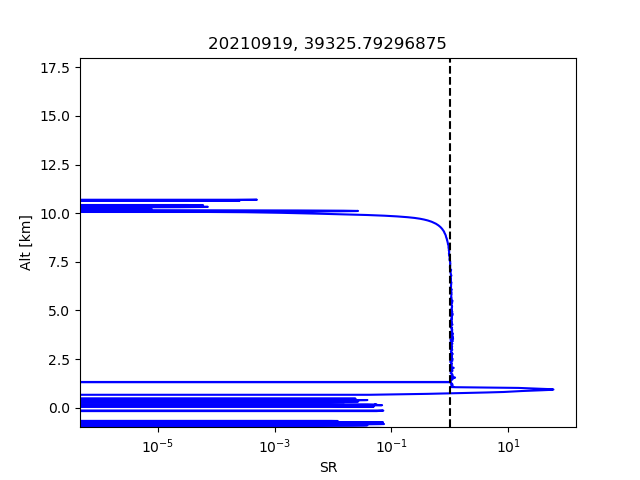

[Text(0.5, 0, 'SR'),
 Text(0, 0.5, 'Alt [km]'),
 Text(0.5, 1.0, '20210919, 39325.79296875')]

In [198]:
fig, ax = plt.subplots()
idx = random.randint(0, time2.shape[0])
ax.semilogx(sr2[idx,:], height2[idx,:], color='b')
ax.axvline(1, color="black", linestyle="--")
ax.set_ylim(-1, 18)
ax.set(xlabel='SR', ylabel='Alt [km]', title=f'{filepath.stem.split("_")[6]}, {time2[idx]}')


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210908_F5_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


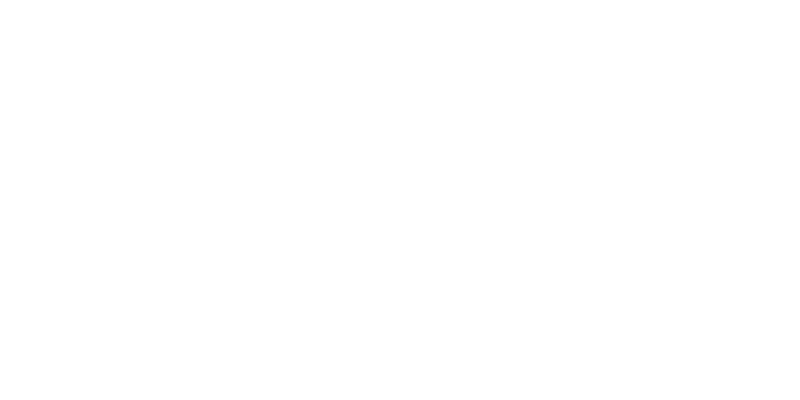

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210910_F6_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


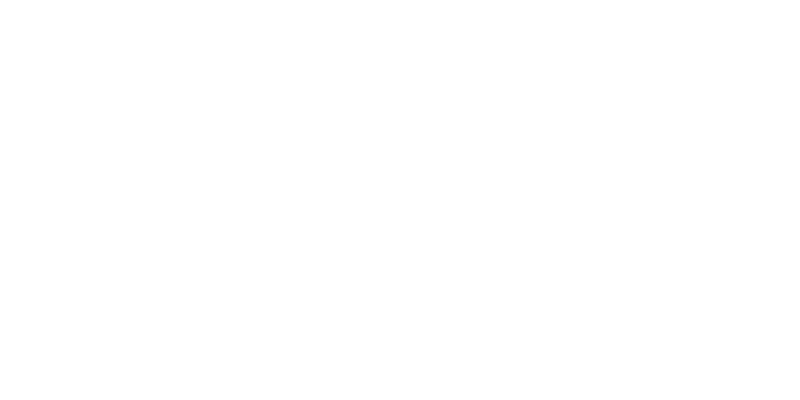

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


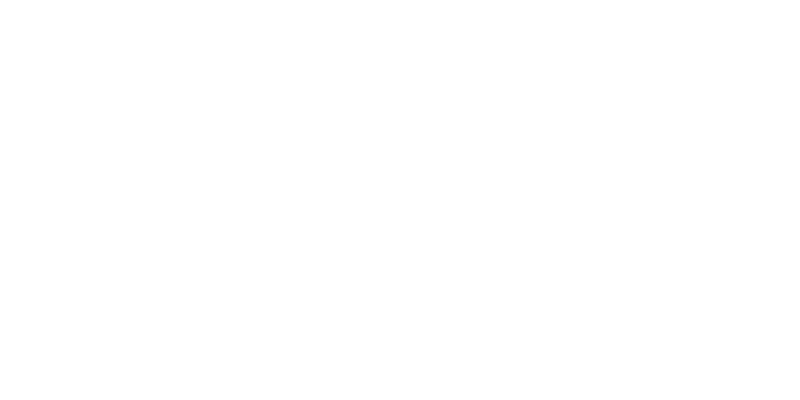

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F8_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


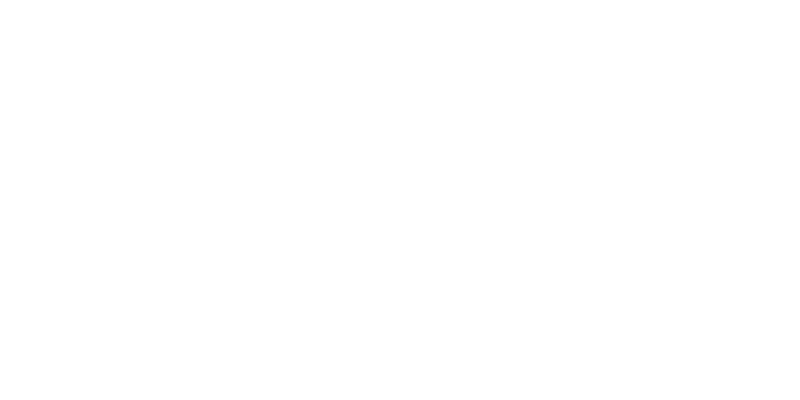

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210914_F9_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


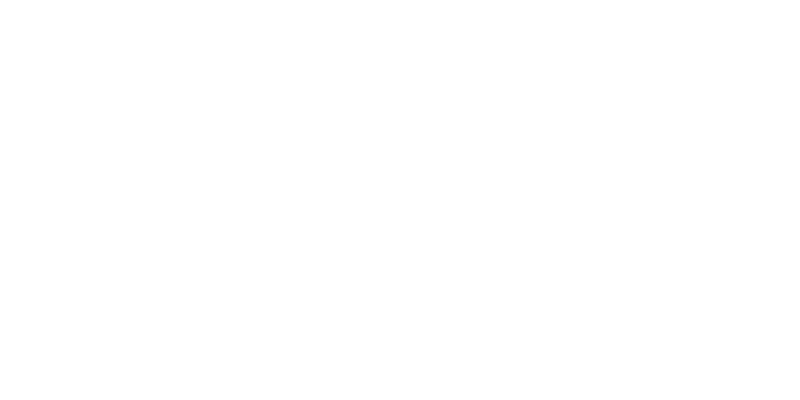

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210916_F10_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


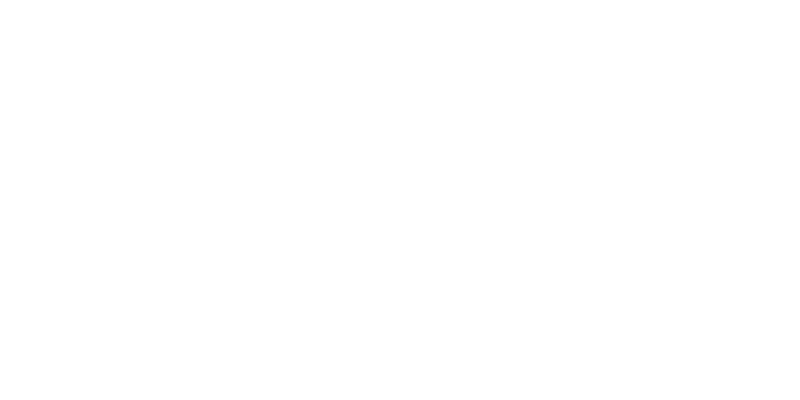

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210917_F11_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


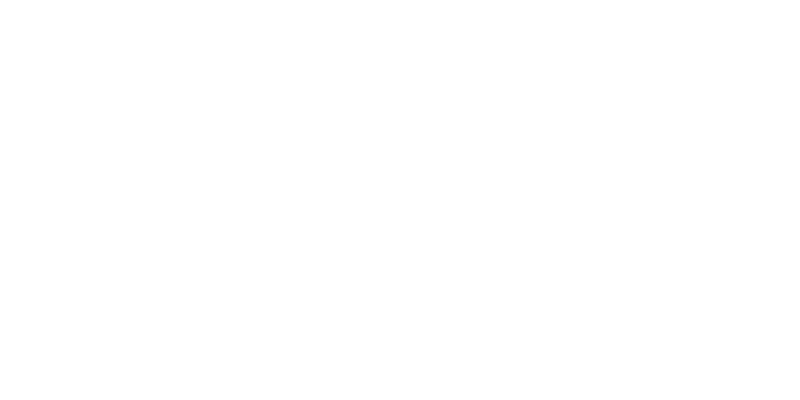

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210918_F12_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


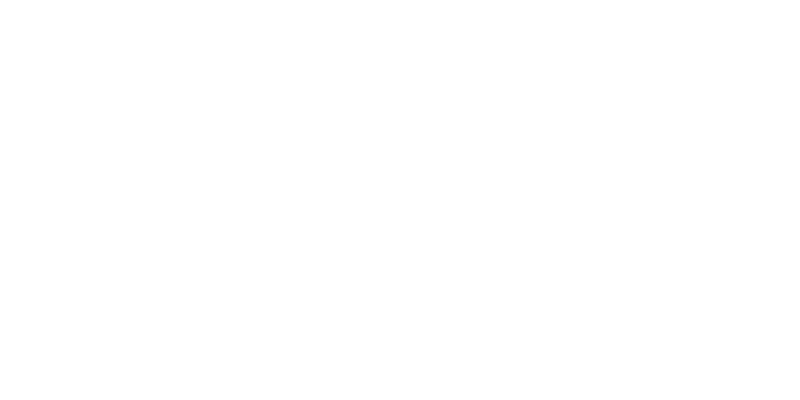

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210919_F13_rg_err_ntirs100.nc


/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Temperature_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'Relative_Humidity_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'U_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'V_wind_ERA5' has multiple fill values {-32767.0, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<IPython.core.display.Javascript object>


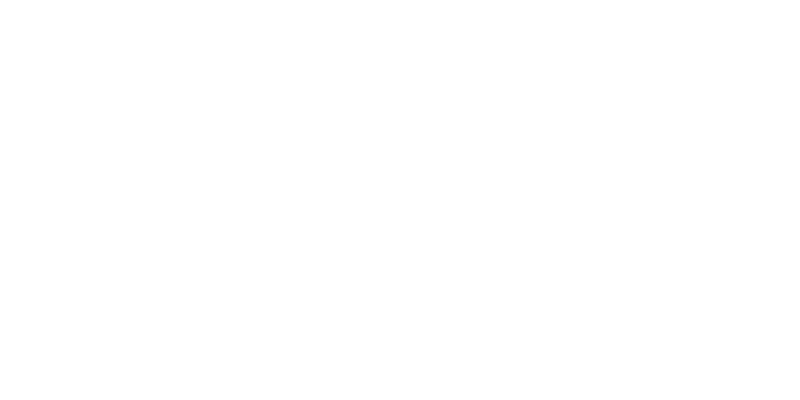

<ipython-input-19-1c63476b439c>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)


In [19]:
for filepath in (LNG_LISTFILES):
    print(filepath)
    data = xr.open_dataset(filepath)
    #ATB 532
#     LNG_Total_Attenuated_Backscatter = data['LNG_Total_Attenuated_Backscatter_532'].where((data['Validity_rate']==1), drop=True)#&(data['LNG_UpDown']==1)#.plot(x='time', y='height', norm=LogNorm(vmin=1e-8, vmax=1e-3), cmap='turbo')
#     Pointing = data['LNG_UpDown'].where((data['Validity_rate']==1), drop=True)
#     print(valid_Time.shape, valid_Height.shape)
#     m1 = np.ma.masked_where(Pointing.values!=1,LNG_Total_Attenuated_Backscatter.values)
#     fig, ax = plt.subplots(figsize=(8,4))
#     pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m1.T, shading='gouraud',
#                    cmap='turbo', norm=LogNorm(vmin=1e-8, vmax=1e-3))
#     plt.colorbar(pcm, ax=ax, label='LNG_Total_Attenuated_Backscatter_532, [m-1.sr-1]')
#     ax.set_ylim(-1,18)
#     ax.set(xlabel='time, SEC UTC', ylabel='Alt, km', title = f'{filepath.stem}')
#     plt.savefig(Path('/homedata/nmpnguyen/LNG/', f'532Nadir_{filepath.stem}.png'))
#     plt.close()
    #SR 355
    valid_rate = (data['Validity_rate']==1)
    valid_Time = data['Time'].isel(time=valid_rate)#&(data['LNG_UpDown'].isel(height=10)==1)
    valid_Height = data['Height'].isel(time=valid_rate)#&(data['LNG_UpDown']==1)
    Pointing = data['LNG_UpDown'].isel(time=valid_rate)
    SR355 = data['LNG_Parallel_Attenuated_Backscatter_355']/data['LNG_Molecular_Parallel_Attenuated_Backscatter_355']
    SR355 = SR355.isel(time=valid_rate).values
    m3 = np.ma.masked_where(Pointing.values!=1, SR355)
    fig, ax = plt.subplots(figsize=(8,4))
    pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T, cmap='turbo', vmin=0, vmax=10)
    plt.colorbar(pcm, ax=ax, label='LNG_Scattering_Ratio_355')
    ax.set_ylim(-1,18)
    ax.set(xlabel='time, SEC UTC', ylabel='Alt, km', title = f'{filepath.stem}')
    plt.savefig(Path('/homedata/nmpnguyen/LNG/', f'355Nadir_SR_{filepath.stem}.png'))
    plt.close()

<IPython.core.display.Javascript object>


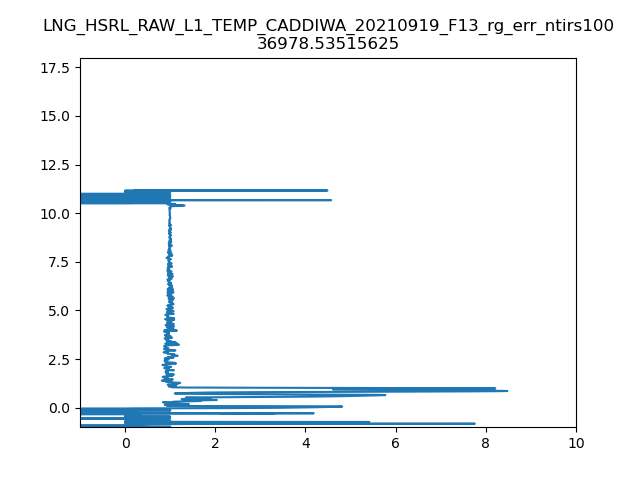

[Text(0.5, 1.0, 'LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210919_F13_rg_err_ntirs100\n36978.53515625')]

In [30]:
fig, ax = plt.subplots()
ax.plot(m3[800,:], valid_Height[800,:])
ax.set_xlim(-1,10)
ax.set_ylim(-1,18)
ax.set(title=f'{filepath.stem}\n{valid_Time[800].values}')

In [116]:
valid_Time = data['Time'].where((data['Validity_rate']==1), drop=True)#&(data['LNG_UpDown'].isel(height=10)==1)
valid_Height = data['Height'].where((data['Validity_rate']==1), drop=True)#&(data['LNG_UpDown']==1)
LNG_Total_Attenuated_Backscatter = data['LNG_Total_Attenuated_Backscatter_532'].where((data['Validity_rate']==1), drop=True)#&(data['LNG_UpDown']==1)#.plot(x='time', y='height', norm=LogNorm(vmin=1e-8, vmax=1e-3), cmap='turbo')
Pointing = data['LNG_UpDown'].where((data['Validity_rate']==1), drop=True)
print(Pointing.shape, data['Time'])

(2391, 3500) <xarray.DataArray 'Time' (time: 2394)>
array([33374.758, 33379.92 , 33384.64 , ..., 45519.074, 45524.066, 45529.17 ],
      dtype=float32)
Dimensions without coordinates: time
Attributes:
    units:      Sec UTC
    long_name:  Second UTC since midnight


In [15]:
#SR 532
SR532 = data['LNG_Total_Attenuated_Backscatter_532']/data['Model_Molecular_Backscatter_532']
valid_rate = (data['Validity_rate']==1)
SR532 = SR532.isel(time=valid_rate).values
Pointing = data['LNG_UpDown'].where((data['Validity_rate']==1), drop=True)
m2 = np.ma.masked_where(Pointing.values!=1, SR532)

#SR 355
SR355 = data['LNG_Parallel_Attenuated_Backscatter_355']/data['LNG_Molecular_Parallel_Attenuated_Backscatter_355']
SR355 = SR355.isel(time=valid_rate).values
m3 = np.ma.masked_where(Pointing.values!=1, SR355)

In [118]:
m1 = np.ma.masked_where(Pointing.values==1,LNG_Total_Attenuated_Backscatter.values)
print(valid_Time.shape, m1.shape)

(2391,) (2391, 3500)


<IPython.core.display.Javascript object>


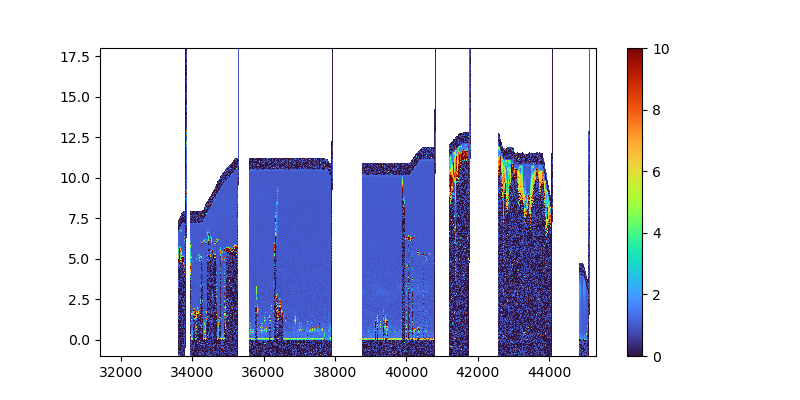

<ipython-input-16-835c283ad36c>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T,


(-1.0, 18.0)

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
pcm = ax.pcolormesh(valid_Time.values, valid_Height.values.T, m3.T,
                   cmap='turbo', vmin=0, vmax=10)
plt.colorbar(pcm, ax=ax)
# pcm2 = ax.pcolormesh(valid_Time.values, valid_Height.values.T, Pointing.values.T, )
# LNG_Total_Attenuated_Backscatter.plot(x='time', y='height', norm=LogNorm(vmin=1e-8, vmax=1e-3))
ax.set_ylim(-1,18)


In [71]:
valid_rate = (data['Validity_rate'] == 1)
angles = np.array(data['LNG_UpDown'].isel(height=10,time=valid_rate).values)
print(angles.shape)
pointings = {1.0:'nadir',2.0:'zenith', 3.0:'ADM 37'}
# print([pointings[ids] for ids in angles])
df_pointing = pd.DataFrame(dict(#time=data['Time'].values[~np.isnan(angles)], alt=[18]*angles[~np.isnan(angles)].shape[0],
                                ids=angles[~np.isnan(angles)], pointing=[pointings[ids] for ids in angles[~np.isnan(angles)]]))
df_pointing, np.array(df_pointing.loc[df_pointing['pointing']=='nadir'].index)
# print(df_pointing)

(2391,)


(      ids pointing
 0     2.0   zenith
 1     2.0   zenith
 2     2.0   zenith
 3     2.0   zenith
 4     2.0   zenith
 ...   ...      ...
 2386  1.0    nadir
 2387  1.0    nadir
 2388  1.0    nadir
 2389  1.0    nadir
 2390  1.0    nadir
 
 [2391 rows x 2 columns],
 array([  75,   76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
          86,   87,   88,   89,   90,   91,   92,   93,   94,   95,   96,
          97,   98,   99,  100,  101,  102,  103,  104,  105,  106,  107,
         108,  109,  110,  111,  112,  113,  114,  115,  116,  117,  118,
         119,  120,  121,  122,  123,  124,  125,  126,  127,  128,  129,
         130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
         141,  142,  143,  144,  145,  146,  147,  148,  149,  150,  151,
         152,  153,  154,  155,  156,  157,  158,  159,  160,  161,  162,
         163,  164,  165,  166,  167,  168,  169,  170,  171,  172,  173,
         174,  175,  176,  177,  178,  179,  180,  181,  182,  183

In [ ]:
fig, ax = plt.subplots()
ax.plot(valid_time, data['Aircraft_Altitude'].isel(time = valid_rate).values, 'k-', label='Aircraft_Altitude')
ax.plot(valid_time, data['HSR_Ground_Echo'].isel(time = valid_rate).values, 'r-', label='Ground Echo')
ax.legend()
ax.set(ylabel='Alt, km', xlabel='Time')

<IPython.core.display.Javascript object>


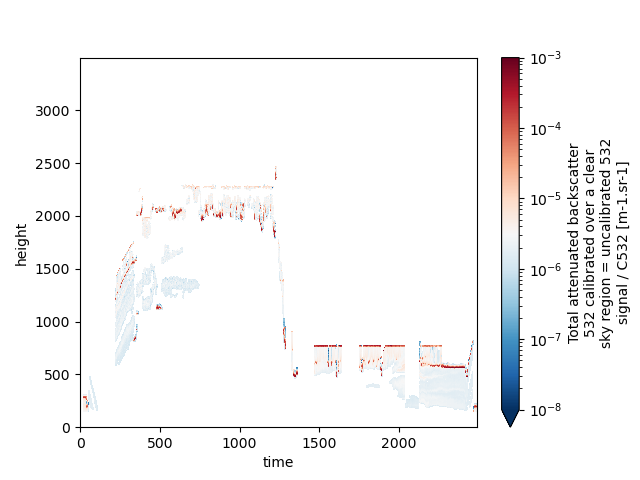

In [10]:
fig, ax = plt.subplots()
data['LNG_Total_Attenuated_Backscatter_532'].where((data['Mask_532']==1)|(data['Mask_532']==2)&(data['LNG_UpDown']==1)).plot(x='time', y='height', norm=LogNorm(vmin=1e-8, vmax=1e-3))

In [19]:
# filtrage 
# 1. validated profile

valid_rate = (data['Validity_rate'] == 1)


mask1 = np.isin(data['Mask_532'].values, [1,2,3])
print(mask1.shape, data['Mask_532'].values.shape)

(2488, 3500) (2488, 3500)


In [ ]:
data['LNG_Total_Attenuated_Backscatter_532'].where((data['Mask_532']==1)&(data['LNG_UpDown']==1), drop=False)